In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
customer = pd.read_csv("Customer_Master.csv")
transaction = pd.read_csv("transactions.csv")

In [136]:
customer.head(2)

,customer_id,age_group,home_location,credit_score,account_age_years,account_type,avg_monthly_income,mobile_banking_user,primary_device,primary_os,primary_browser,avg_transaction_amount,transaction_frequency,employment_status,preferred_transaction_types,international_activity,risk_score
0,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,Samsung Internet,6498.703229,22,Self-employed,"['Loan Payment', 'Internet Bill Payment', 'Wat...",True,30
1,2,26-35,Kathmandu,607,7,Savings,34640.469961,True,Android Tablet,Android,Chrome,3946.766234,6,Employed,"['Loan Payment', 'Branch Deposit', 'QR Payment...",True,33


In [137]:
transaction.head(2)

,transaction_id,customer_id,transaction_date,transaction_type,amount,location,ip_address,device,os,browser,...,credit_score,account_age_years,account_type,avg_monthly_income,mobile_banking_user,transaction_frequency,employment_status,international_activity,risk_score,is_suspicious
0,TXN20241124104326,727,11/24/2024 15:29,Inward Remittance,13925.72,Nawalparasi,103.92.86.139,NaN,NaN,NaN,...,673,1,Current,65911.89284,True,20,Employed,False,24,False
1,TXN20241204130277,539,12/4/2024 5:26,ATM Withdrawal,25037.35,Kaski,27.201.191.54,NaN,NaN,NaN,...,666,11,Current,75126.72458,True,3,Employed,False,19,False


#### Find intersecting columns

In [138]:
duplicate_cols = set(customer.columns).intersection(set(transaction.columns))
duplicate_cols

{'account_age_years',
 'account_type',
 'age_group',
 'avg_monthly_income',
 'credit_score',
 'customer_id',
 'employment_status',
 'home_location',
 'international_activity',
 'mobile_banking_user',
 'risk_score',
 'transaction_frequency'}

In [139]:
duplicate_cols = duplicate_cols - {'customer_id'}
duplicate_cols

{'account_age_years',
 'account_type',
 'age_group',
 'avg_monthly_income',
 'credit_score',
 'employment_status',
 'home_location',
 'international_activity',
 'mobile_banking_user',
 'risk_score',
 'transaction_frequency'}

In [140]:
transaction = transaction.drop(columns= duplicate_cols)

In [141]:
#check duplicate again
duplicate_cols = set(customer.columns).intersection(set(transaction.columns))
duplicate_cols

{'customer_id'}

#### merge these datasets

In [142]:
dataset = customer.merge(transaction, on="customer_id", how="inner")

In [143]:
dataset.head(5)

,customer_id,age_group,home_location,credit_score,account_age_years,account_type,avg_monthly_income,mobile_banking_user,primary_device,primary_os,...,device,os,browser,attempt_sequence,time_of_day,transaction_velocity,status,auth_method,amount_deviation,is_suspicious
0,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,...,NaN,NaN,NaN,1,Evening,1,Success,Face Recognition,1.493718,False
1,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,...,NaN,NaN,NaN,1,Evening,1,Success,Password,0.776204,False
2,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,...,NaN,NaN,NaN,1,Late Night,1,Success,Face Recognition,1.211956,False
3,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,...,NaN,NaN,NaN,1,Early Morning,4,Success,PIN,1.236164,False
4,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,...,NaN,NaN,NaN,1,Early Morning,1,Success,OTP,1.292338,False


In [144]:
#check for null
dataset.isna().sum()

customer_id                        0
age_group                          0
home_location                      0
credit_score                       0
account_age_years                  0
account_type                       0
avg_monthly_income                 0
mobile_banking_user                0
primary_device                 14202
primary_os                     14202
primary_browser                14202
avg_transaction_amount             0
transaction_frequency              0
employment_status                  0
preferred_transaction_types        0
international_activity             0
risk_score                         0
transaction_id                     0
transaction_date                   0
transaction_type                   0
amount                             0
location                           0
ip_address                         0
device                         79991
os                             79963
browser                        79967
attempt_sequence                   0
t

In [145]:
dataset.shape

(103500, 33)

In [146]:
#device, os and browser have about 77% of null data so we drop those columns
dataset.drop(columns=["device", "os", "browser", "attempt_sequence"], inplace= True)

In [147]:
dataset.duplicated().sum()

np.int64(0)

In [148]:
dataset.isna().sum()

customer_id                        0
age_group                          0
home_location                      0
credit_score                       0
account_age_years                  0
account_type                       0
avg_monthly_income                 0
mobile_banking_user                0
primary_device                 14202
primary_os                     14202
primary_browser                14202
avg_transaction_amount             0
transaction_frequency              0
employment_status                  0
preferred_transaction_types        0
international_activity             0
risk_score                         0
transaction_id                     0
transaction_date                   0
transaction_type                   0
amount                             0
location                           0
ip_address                         0
time_of_day                        0
transaction_velocity               0
status                             0
auth_method                        0
a

In [149]:
#now filling values with mode for 3 remaining columns
dataset["primary_device"].fillna(dataset["primary_device"].mode()[0], inplace= True)
dataset["primary_os"].fillna(dataset["primary_os"].mode()[0], inplace= True)
dataset["primary_browser"].fillna(dataset["primary_browser"].mode()[0], inplace= True)

C:\Users\Sandesh Khatiwada\AppData\Local\Temp\ipykernel_11972\1276973883.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["primary_device"].fillna(dataset["primary_device"].mode()[0], inplace= True)
C:\Users\Sandesh Khatiwada\AppData\Local\Temp\ipykernel_11972\1276973883.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [150]:
dataset.isna().sum().sum()

np.int64(0)

In [151]:
dataset.head(3)

,customer_id,age_group,home_location,credit_score,account_age_years,account_type,avg_monthly_income,mobile_banking_user,primary_device,primary_os,...,transaction_type,amount,location,ip_address,time_of_day,transaction_velocity,status,auth_method,amount_deviation,is_suspicious
0,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,...,Internet Bill Payment,9707.23,Palpa,27.86.22.5,Evening,1,Success,Face Recognition,1.493718,False
1,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,...,Internet Bill Payment,5044.32,Palpa,210.62.41.218,Evening,1,Success,Password,0.776204,False
2,1,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,...,Water Bill Payment,7876.14,Palpa,210.51.34.80,Late Night,1,Success,Face Recognition,1.211956,False


#### Comparing different sorts of features

In [152]:
# visualizing which transaction type fraud is the most
count_and_rate = (
    dataset.groupby('transaction_type')['is_suspicious']
    .agg(['sum', 'count', 'mean'])
    .sort_values(by='mean', ascending=False)
)

print(count_and_rate)

                              sum  count      mean
transaction_type                                  
Mobile Banking Transfer      1425   4775  0.298429
ATM Withdrawal                837   4947  0.169193
Wallet Load - eSewa           608   4514  0.134692
QR Payment                    534   4382  0.121862
Mobile Banking Bill Payment   546   4652  0.117369
Branch Deposit                343   4161  0.082432
Electricity Bill Payment      154   3843  0.040073
Cheque Deposit                144   3626  0.039713
Water Bill Payment            146   3822  0.038200
POS Transaction               141   3836  0.036757
Internet Bill Payment         140   3877  0.036110
Outward Remittance            135   3849  0.035074
Hotel Booking Payment         139   4021  0.034569
Airline Ticket Payment        123   3840  0.032031
Interest Credit               119   3722  0.031972
Mobile Recharge               133   4245  0.031331
School Fee Payment            129   4159  0.031017
Inward Remittance             1

[]

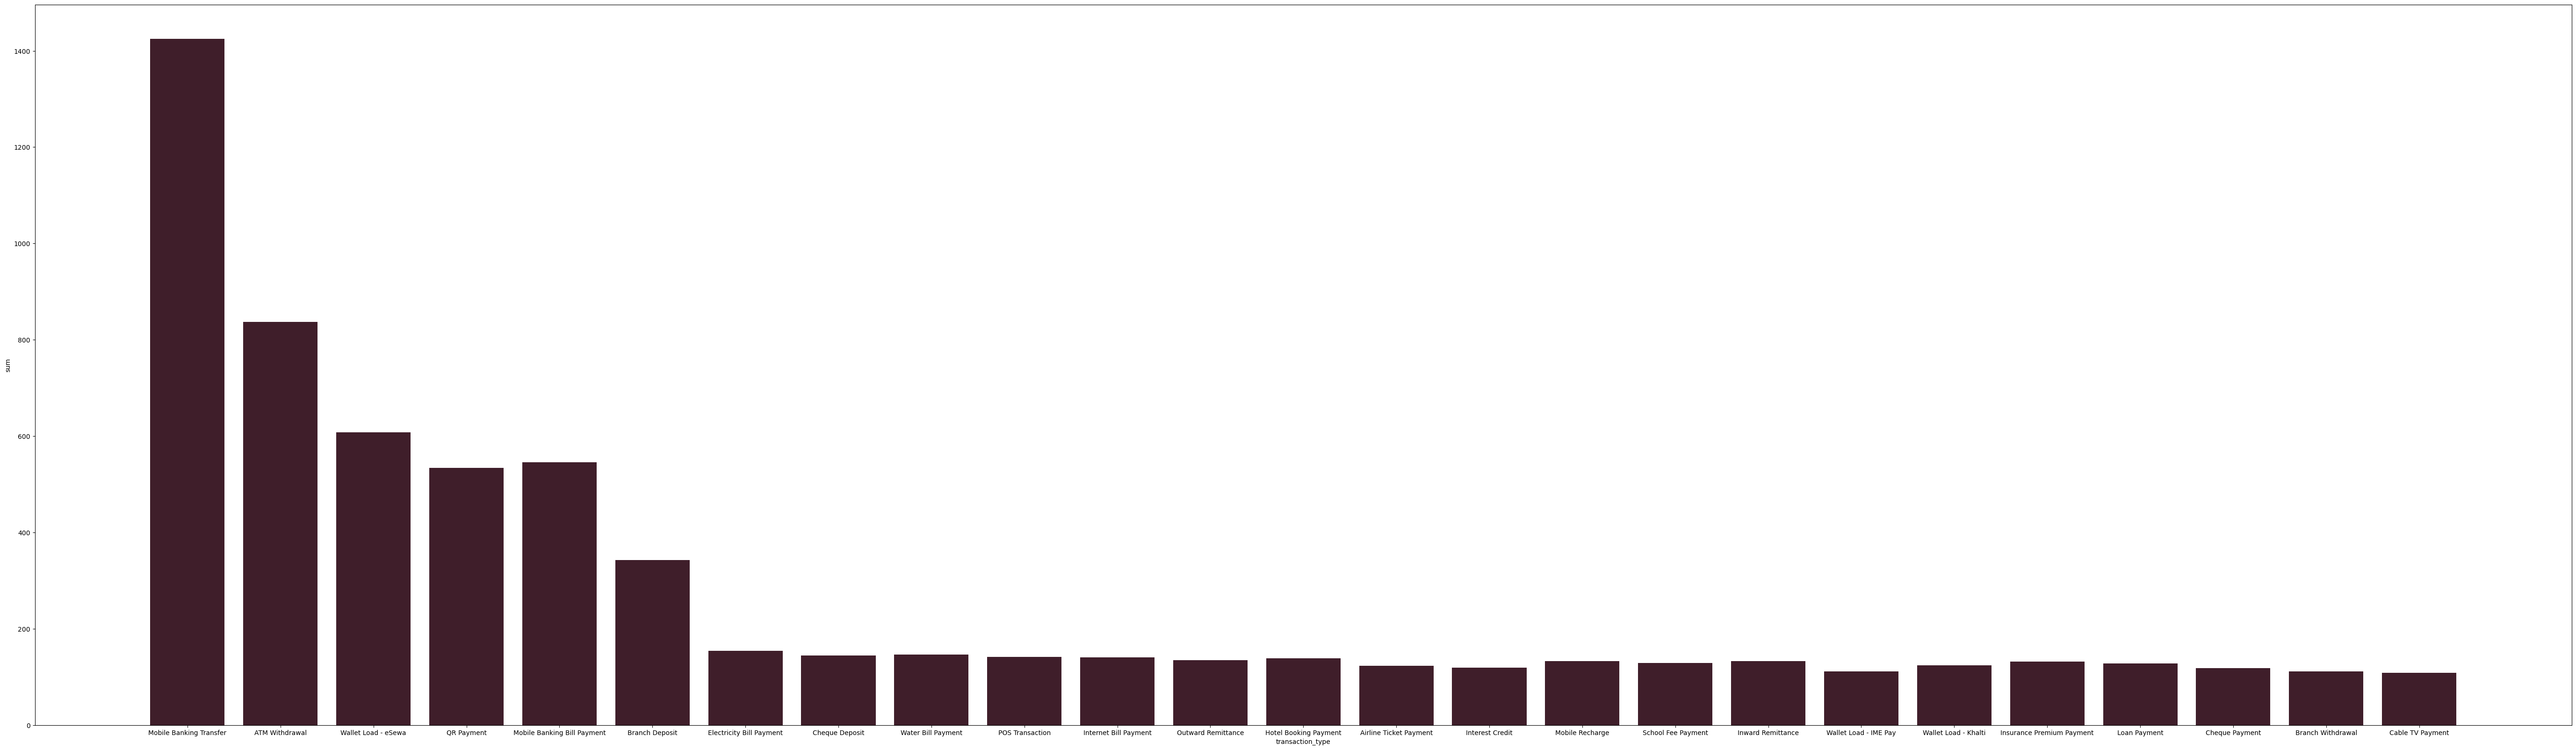

In [153]:
plt.figure(figsize=(70,20))
sns.barplot(
    data=count_and_rate,
    x = 'transaction_type',
    y = 'sum',
    color = '#451828'
)
plt.plot()

In [154]:
# time of day vs fraud
fraud_by_time = (
    dataset.groupby('time_of_day')['is_suspicious']
    .agg(['sum', 'mean'])
    .sort_values(by = 'sum', ascending=False)
    .reset_index()
)

print(fraud_by_time)

      time_of_day   sum      mean
0           Night  1907  0.137115
1  Business Hours  1434  0.042668
2      Late Night  1401  0.054545
3   Early Morning  1031  0.077864
4         Evening   988  0.057920


<Axes: xlabel='time_of_day', ylabel='sum'>

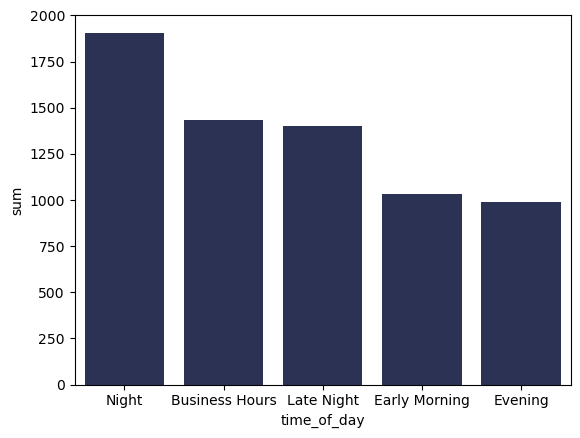

In [155]:
sns.barplot(
    data = fraud_by_time, 
    x = 'time_of_day', 
    y = 'sum',
    color= '#252d59'
)

In [156]:
#location vs fraud
fraud_by_location = (
    dataset.groupby('location')['is_suspicious']
    .agg(['sum', 'mean'])
    .sort_values(by = 'sum', ascending= False)
)

print(fraud_by_location)

              sum      mean
location                   
Kathmandu     396  0.020643
Pokhara       270  0.032032
Birgunj       249  0.057546
Bhaktapur     244  0.051597
Lalitpur      228  0.051213
Ilam          225  0.069103
Biratnagar    219  0.045540
Hetauda       218  0.062662
Chitwan       218  0.069338
Butwal        206  0.076637
Itahari       204  0.080473
Dharan        203  0.058233
Janakpur      201  0.076021
Nepalgunj     187  0.074118
Dhangadhi     185  0.088900
Syangja       183  0.197198
Sindhuli      170  0.184783
Kailali       167  0.170234
Dolakha       167  0.178419
Bardibas      166  0.180043
Delhi         162  1.000000
Jeetpur       161  0.177508
Ramechhap     160  0.170576
Kalaiya       156  0.163522
Bardiya       153  0.160042
Birtamode     138  0.154190
Abu Dhabi      92  1.000000
Bangkok        87  1.000000
Tokyo          87  1.000000
New York       87  1.000000
London         85  1.000000
Sydney         77  1.000000
Seoul          76  1.000000
Kuala Lumpur   75  1

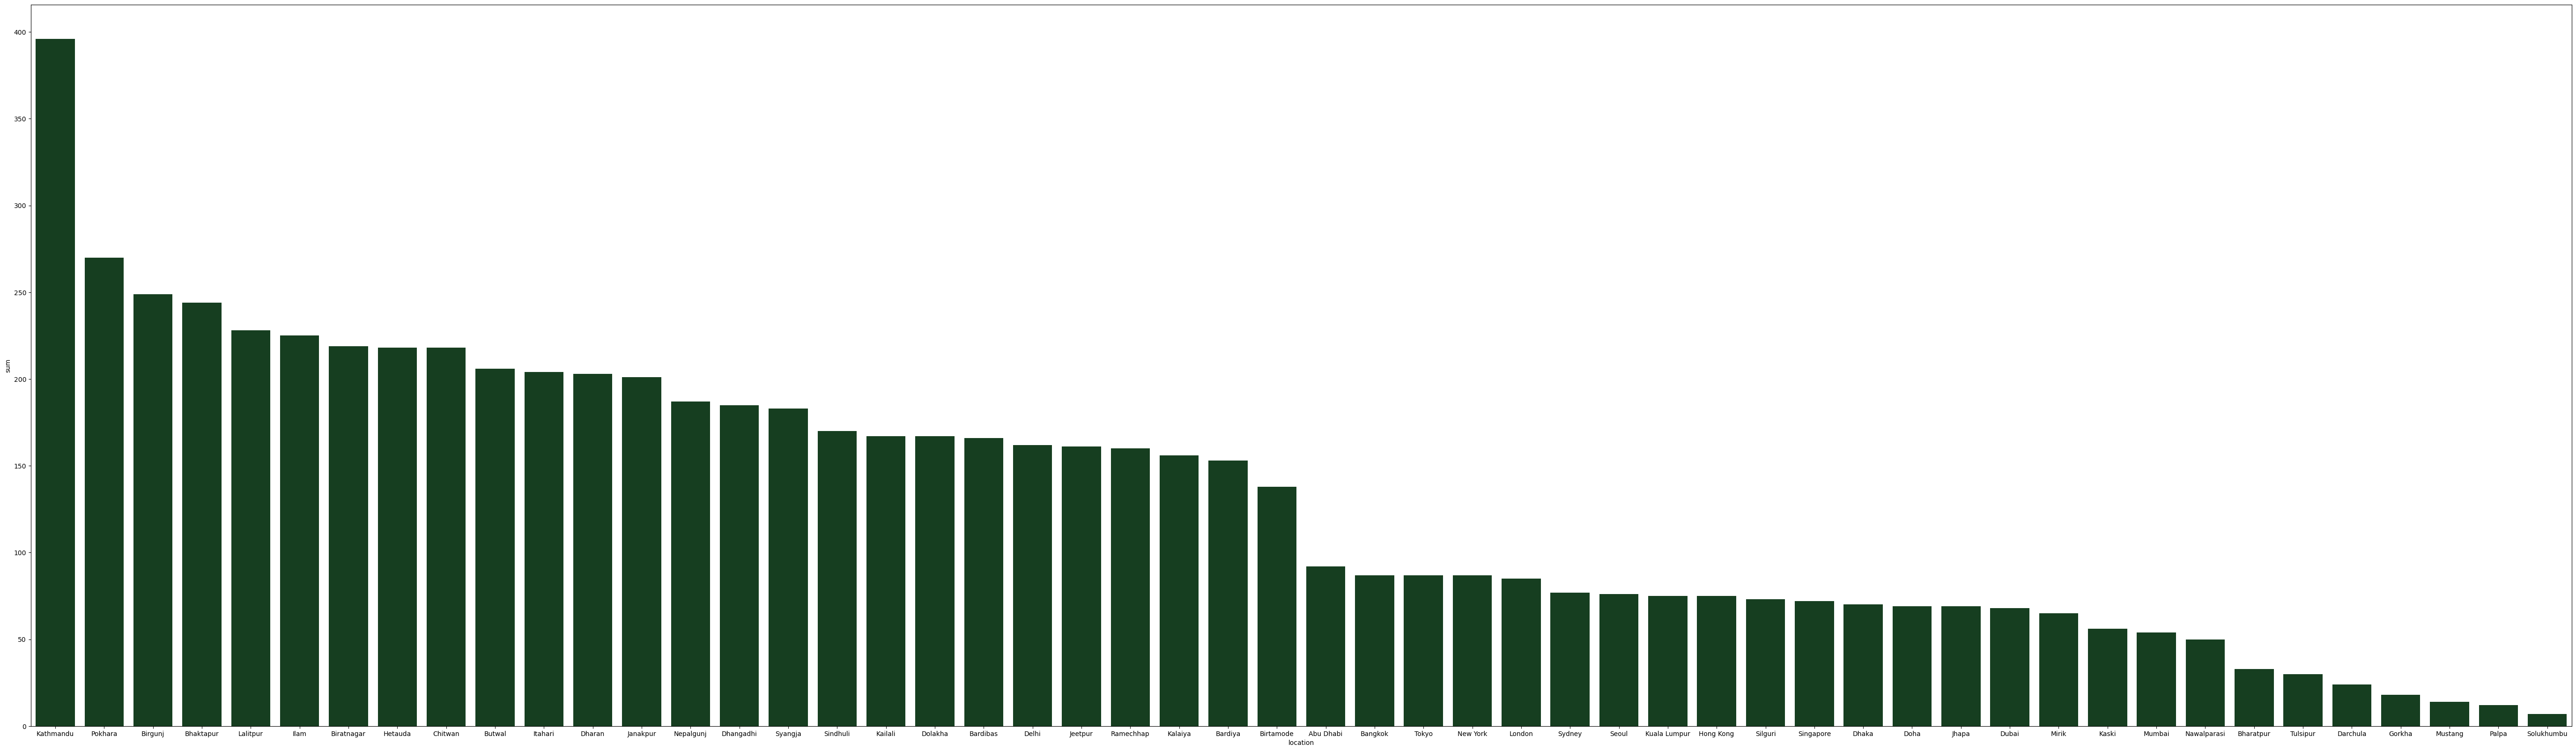

In [157]:
#figure for this
plt.figure(figsize=(70,20))
sns.barplot(data=fraud_by_location, x= 'location', y = 'sum', color='#0f451d')
plt.show()

In [158]:
#fraud by age 
dataset['age_group'] = pd.Categorical(
    dataset['age_group'],
    ordered=True,
    categories=['18-25', '26-35', '36-45', '46-55', '56+']
)

dataset.groupby('age_group')['is_suspicious'].sum()

C:\Users\Sandesh Khatiwada\AppData\Local\Temp\ipykernel_11972\3527396111.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.groupby('age_group')['is_suspicious'].sum()


age_group
18-25    1070
26-35    2032
36-45    1526
46-55    1104
56+         0
Name: is_suspicious, dtype: int64

C:\Users\Sandesh Khatiwada\AppData\Local\Temp\ipykernel_11972\143820651.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_fraud = dataset.groupby('age_group', as_index=False)['is_suspicious'].sum()


<Axes: xlabel='age_group', ylabel='is_suspicious'>

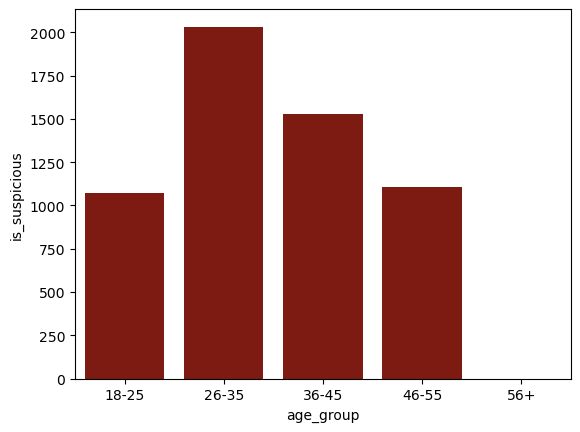

In [159]:
#make graph for this
# aggregate first
age_fraud = dataset.groupby('age_group', as_index=False)['is_suspicious'].sum()

# plot
sns.barplot(data=age_fraud, x='age_group', y='is_suspicious', color='#8f0c00')

In [160]:
#comparing fraud against various features
combined = (
    dataset.groupby(['transaction_type', 'time_of_day', 'location', 'age_group'])['is_suspicious']
    .agg(['sum', 'count'])
    .sort_values(by='sum', ascending=False)
)

print(combined)

C:\Users\Sandesh Khatiwada\AppData\Local\Temp\ipykernel_11972\318046994.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.groupby(['transaction_type', 'time_of_day', 'location', 'age_group'])['is_suspicious']


                                                            sum  count
transaction_type        time_of_day    location  age_group            
Mobile Banking Transfer Night          Butwal    26-35       13     18
                                       Syangja   26-35       13     14
Wallet Load - eSewa     Night          Lalitpur  26-35       12     18
ATM Withdrawal          Night          Birgunj   36-45       12     13
Mobile Banking Transfer Night          Dhangadhi 26-35       10     12
...                                                         ...    ...
Airline Ticket Payment  Night          London    26-35        0      0
                                                 36-45        0      0
ATM Withdrawal          Business Hours Butwal    56+          0      0
                                       Chitwan   18-25        0      6
Water Bill Payment      Night          Sindhuli  36-45        0      0

[32500 rows x 2 columns]


In [161]:
top5 = combined.sort_values(by='sum', ascending=False).head(5)
top5

sum  count
transaction_type        time_of_day location  age_group            
Mobile Banking Transfer Night       Butwal    26-35       13     18
                                    Syangja   26-35       13     14
Wallet Load - eSewa     Night       Lalitpur  26-35       12     18
ATM Withdrawal          Night       Birgunj   36-45       12     13
Mobile Banking Transfer Night       Dhangadhi 26-35       10     12

In [162]:
top5 = combined.head(5).reset_index()
top5

,transaction_type,time_of_day,location,age_group,sum,count
0,Mobile Banking Transfer,Night,Butwal,26-35,13,18
1,Mobile Banking Transfer,Night,Syangja,26-35,13,14
2,Wallet Load - eSewa,Night,Lalitpur,26-35,12,18
3,ATM Withdrawal,Night,Birgunj,36-45,12,13
4,Mobile Banking Transfer,Night,Dhangadhi,26-35,10,12


In [163]:
# convert everything to string before concatenation
top5 = top5.astype({
    "transaction_type": "string",
    "time_of_day": "string",
    "location": "string",
    "age_group": "string"
})

top5["combo"] = (
    top5["transaction_type"] + " | " +
    top5["time_of_day"] + " | " +
    top5["location"] + " | " +
    top5["age_group"]
)

<Axes: xlabel='combo', ylabel='sum'>

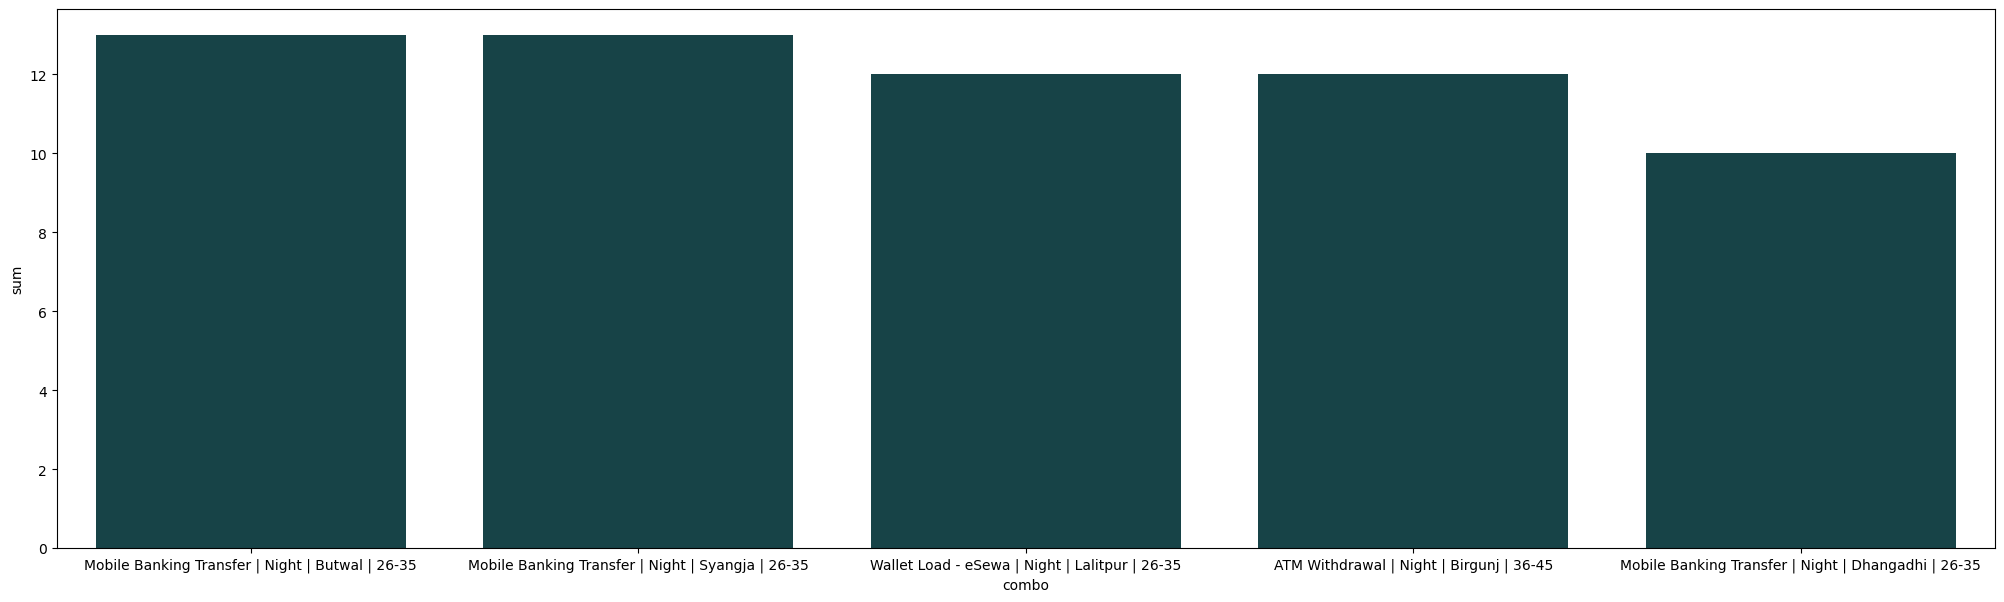

In [164]:
plt.figure(figsize=(25,7))
sns.barplot(data=top5, x="combo", y="sum", color= "#0f4a4f")
# plt.xticks(rotation=45)

In [165]:
for col in dataset.columns:
    print("unique values of dataset[",col, "]: ", dataset[col].unique(), "\n")

unique values of dataset[ customer_id ]:  [   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189

In [166]:
#normalizing avg_monthly_income , amount, credit_score , avg_transaction_amount
from sklearn.preprocessing import MinMaxScaler
ms_avg_monthly_income = MinMaxScaler(feature_range=(0, 1))
ms_amount = MinMaxScaler(feature_range=(0, 1))
ms_credit_score = MinMaxScaler(feature_range=(0, 1))
ms_avg_transaction_amount = MinMaxScaler(feature_range=(0, 1))
ms_amount_deviation = MinMaxScaler(feature_range=(0, 1))

In [167]:
dataset["avg_monthly_income"] = ms_avg_monthly_income.fit_transform(dataset[["avg_monthly_income"]])
dataset["amount"] = ms_amount.fit_transform(dataset[["amount"]])
dataset["credit_score"] = ms_credit_score.fit_transform(dataset[["credit_score"]])
dataset["avg_transaction_amount"] = ms_avg_transaction_amount.fit_transform(dataset[["avg_transaction_amount"]])
dataset["amount_deviation"] = ms_amount_deviation.fit_transform(dataset[["amount_deviation"]])

In [168]:
#label encoding age_group, home_location ,account_type , mobile_banking_user ,  primary_device , primary_os , primary_browser , employment_status , 
# preferred_transaction_types , location , time_of_day , status , auth_method , is_suspicious , transaction_type

In [169]:
from sklearn.preprocessing import LabelEncoder
le_age_group = LabelEncoder()
le_home_location = LabelEncoder()
le_account_type = LabelEncoder()
le_mobile_banking_user = LabelEncoder()
le_primary_device = LabelEncoder()
le_primary_os = LabelEncoder()
le_primary_browser = LabelEncoder()
le_employment_status = LabelEncoder()
le_preferred_transaction_types = LabelEncoder()
le_location = LabelEncoder()
le_time_of_day = LabelEncoder()
le_status = LabelEncoder()
le_auth_method = LabelEncoder()
le_is_suspicious = LabelEncoder()
le_transaction_type = LabelEncoder()

In [170]:
dataset["age_group"] = le_age_group.fit_transform(dataset["age_group"])
dataset["home_location"] = le_home_location.fit_transform(dataset["home_location"])
dataset["account_type"] = le_account_type.fit_transform(dataset["account_type"])
dataset["mobile_banking_user"] = le_mobile_banking_user.fit_transform(dataset["mobile_banking_user"])
dataset["primary_device"] = le_primary_device.fit_transform(dataset["primary_device"])
dataset["primary_os"] = le_primary_os.fit_transform(dataset["primary_os"])
dataset["primary_browser"] = le_primary_browser.fit_transform(dataset["primary_browser"])
dataset["employment_status"] = le_employment_status.fit_transform(dataset["employment_status"])
dataset["preferred_transaction_types"] = le_preferred_transaction_types.fit_transform(dataset["preferred_transaction_types"])
dataset["location"] = le_location.fit_transform(dataset["location"])
dataset["time_of_day"] = le_time_of_day.fit_transform(dataset["time_of_day"])
dataset["status"] = le_status.fit_transform(dataset["status"])
dataset["auth_method"] = le_auth_method.fit_transform(dataset["auth_method"])
dataset["is_suspicious"] = le_is_suspicious.fit_transform(dataset["is_suspicious"])
dataset["transaction_type"] = le_transaction_type.fit_transform(dataset["transaction_type"])

In [171]:
label_maps = {
    "age_group": dict(zip(le_age_group.classes_, le_age_group.transform(le_age_group.classes_))),
    "home_location": dict(zip(le_home_location.classes_, le_home_location.transform(le_home_location.classes_))),
    "account_type": dict(zip(le_account_type.classes_, le_account_type.transform(le_account_type.classes_))),
    "mobile_banking_user": dict(zip(le_mobile_banking_user.classes_, le_mobile_banking_user.transform(le_mobile_banking_user.classes_))),
    "primary_device": dict(zip(le_primary_device.classes_, le_primary_device.transform(le_primary_device.classes_))),
    "primary_os": dict(zip(le_primary_os.classes_, le_primary_os.transform(le_primary_os.classes_))),
    "primary_browser": dict(zip(le_primary_browser.classes_, le_primary_browser.transform(le_primary_browser.classes_))),
    "employment_status": dict(zip(le_employment_status.classes_, le_employment_status.transform(le_employment_status.classes_))),
    "preferred_transaction_types": dict(zip(le_preferred_transaction_types.classes_, le_preferred_transaction_types.transform(le_preferred_transaction_types.classes_))),
    "location": dict(zip(le_location.classes_, le_location.transform(le_location.classes_))),
    "time_of_day": dict(zip(le_time_of_day.classes_, le_time_of_day.transform(le_time_of_day.classes_))),
    "status": dict(zip(le_status.classes_, le_status.transform(le_status.classes_))),
    "auth_method": dict(zip(le_auth_method.classes_, le_auth_method.transform(le_auth_method.classes_))),
    "is_suspicious": dict(zip(le_is_suspicious.classes_, le_is_suspicious.transform(le_is_suspicious.classes_))),
    "transaction_type": dict(zip(le_transaction_type.classes_, le_transaction_type.transform(le_transaction_type.classes_))),
}
label_maps

{'age_group': {'18-25': np.int64(0),
  '26-35': np.int64(1),
  '36-45': np.int64(2),
  '46-55': np.int64(3),
  nan: np.int64(4)},
 'home_location': {'Bhaktapur': np.int64(0),
  'Bharatpur': np.int64(1),
  'Biratnagar': np.int64(2),
  'Birgunj': np.int64(3),
  'Butwal': np.int64(4),
  'Chitwan': np.int64(5),
  'Darchula': np.int64(6),
  'Dhangadhi': np.int64(7),
  'Dharan': np.int64(8),
  'Gorkha': np.int64(9),
  'Hetauda': np.int64(10),
  'Ilam': np.int64(11),
  'Itahari': np.int64(12),
  'Janakpur': np.int64(13),
  'Jhapa': np.int64(14),
  'Kaski': np.int64(15),
  'Kathmandu': np.int64(16),
  'Lalitpur': np.int64(17),
  'Mustang': np.int64(18),
  'Nawalparasi': np.int64(19),
  'Nepalgunj': np.int64(20),
  'Palpa': np.int64(21),
  'Pokhara': np.int64(22),
  'Solukhumbu': np.int64(23),
  'Tulsipur': np.int64(24)},
 'account_type': {'Current': np.int64(0),
  'Fixed Deposit': np.int64(1),
  'Premium': np.int64(2),
  'Savings': np.int64(3)},
 'mobile_banking_user': {np.False_: np.int64(0),

In [172]:
dataset.head()

,customer_id,age_group,home_location,credit_score,account_age_years,account_type,avg_monthly_income,mobile_banking_user,primary_device,primary_os,...,transaction_type,amount,location,ip_address,time_of_day,transaction_velocity,status,auth_method,amount_deviation,is_suspicious
0,1,1,21,0.745794,13,3,0.133017,1,4,3,...,11,0.010100,40,27.86.22.5,2,1,1,0,0.041344,0
1,1,1,21,0.745794,13,3,0.133017,1,4,3,...,11,0.005244,40,210.62.41.218,2,1,1,5,0.021482,0
2,1,1,21,0.745794,13,3,0.133017,1,4,3,...,24,0.008193,40,210.51.34.80,3,1,1,0,0.033544,0
3,1,1,21,0.745794,13,3,0.133017,1,4,3,...,18,0.008357,40,43.26.97.5,1,4,1,4,0.034214,0
4,1,1,21,0.745794,13,3,0.133017,1,4,3,...,13,0.008737,40,103.233.246.4,1,1,1,3,0.035769,0


In [173]:
dataset.dtypes

customer_id                      int64
age_group                        int64
home_location                    int64
credit_score                   float64
account_age_years                int64
account_type                     int64
avg_monthly_income             float64
mobile_banking_user              int64
primary_device                   int64
primary_os                       int64
primary_browser                  int64
avg_transaction_amount         float64
transaction_frequency            int64
employment_status                int64
preferred_transaction_types      int64
international_activity            bool
risk_score                       int64
transaction_id                  object
transaction_date                object
transaction_type                 int64
amount                         float64
location                         int64
ip_address                      object
time_of_day                      int64
transaction_velocity             int64
status                   

In [174]:
dataset['transaction_id'].nunique()

103492

In [175]:
dataset['transaction_date'].nunique()

98133

In [176]:
dataset.drop(columns=['ip_address', 'transaction_id', 'transaction_date'], inplace=True)

In [177]:
#now for algorithm seperate the data
X = dataset.drop(columns=['is_suspicious'])
y = dataset['is_suspicious'] 
X.ndim

2

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
# help(train_test_split)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [186]:
rf = LinearRegression()
lg = LogisticRegression()

In [183]:
rf.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [185]:
rf.score(X_test, y_test)

0.6133427224337857

In [187]:
lg.fit(X_train, y_train)

D:\Installations\Miniconda\envs\dsml\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [188]:
lg.score(X_test, y_test)

0.9717171717171718

In [190]:
y_pred = lg.predict(X_test)

In [192]:
# finding confusion matrix for this
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report;
confusion_logistic  = confusion_matrix(y_test, y_pred)
confusion_logistic

array([[31886,     6],
       [  960,  1303]])

[]

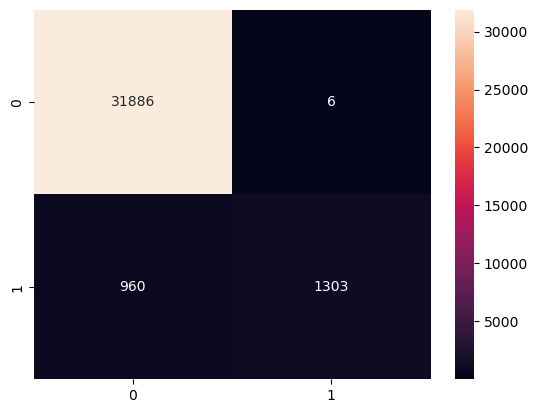

In [193]:
sns.heatmap(confusion_logistic, annot=True, fmt="d")
plt.plot()

In [197]:
!jupyter nbconvert --to webpdf "D:/Github/Data-Science-And-Machine-Learning-Course/Decision Support System/Suspicious_Transaction_Detection_Using_Customer_Transaction_Data_Integration.ipynb" --output-dir="D:/Github/Data-Science-And-Machine-Learning-Course/Decision Support System" --output="1_Suspicious_Transaction_Detection" --allow-chromium-download

[NbConvertApp] Converting notebook D:/Github/Data-Science-And-Machine-Learning-Course/Decision Support System/Suspicious_Transaction_Detection_Using_Customer_Transaction_Data_Integration.ipynb to webpdf
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 750199 bytes to D:\Github\Data-Science-And-Machine-Learning-Course\Decision Support System\1_Suspicious_Transaction_Detection.pdf
